## 1) Dataset Preparation

In [1]:
# Tokenization of paragraphs/sentences
import nltk
import re
import heapq
import numpy as np
import pandas as pd
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

[nltk_data] Downloading package stopwords to /home/shri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Load Dataset

In [2]:
patient_conversations = pd.read_csv('/home/shri/Downloads/NLP/ZS-DATA_NLP_CLASSIFICATION/dataset/train.csv',header=0,encoding = 'unicode_escape')
patient_conversations.head(5)

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0


### Explore the Dataset

In [3]:
#patient_conversation_colm_info
patient_conversations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 9 columns):
Source             1157 non-null object
Host               1098 non-null object
Link               1157 non-null object
Date(ET)           1157 non-null object
Time(ET)           1157 non-null object
time(GMT)          996 non-null object
Title              941 non-null object
TRANS_CONV_TEXT    1156 non-null object
Patient_Tag        1157 non-null int64
dtypes: int64(1), object(8)
memory usage: 81.4+ KB


In [4]:
# Select only important variable (here, "TRANS_CONV_TEXT"  and "Patient_Tag") 
patient_conversations= patient_conversations[["TRANS_CONV_TEXT","Patient_Tag"]]
patient_conversations.head(2)

,TRANS_CONV_TEXT,Patient_Tag
0,I don't disagree with you in principle. I'm ju...,0
1,I am always dizzy I get dizzy standing up so I...,1


In [5]:
# Change the Variable Name (for simplicity)
patient_conversations.rename({'TRANS_CONV_TEXT': 'Text', 'Patient_Tag': 'Pat_Tag'}, axis=1, inplace=True)
patient_conversations.head(2)

,Text,Pat_Tag
0,I don't disagree with you in principle. I'm ju...,0
1,I am always dizzy I get dizzy standing up so I...,1


In [6]:
# Check the Shape of the dataset
patient_conversations.shape

(1157, 2)

In [7]:
## extracting the number of examples of each class
Pat_Tag_0=len(patient_conversations.groupby(['Pat_Tag']).groups[0])
print("Total number of Patient_Tag for 0th value : ",Pat_Tag_0)
Pat_Tag_1=len(patient_conversations.groupby(['Pat_Tag']).groups[1])
print("Total number of Patient_Tag for 1st value : ",Pat_Tag_1)

Total number of Patient_Tag for 0th value :  917
Total number of Patient_Tag for 1st value :  240


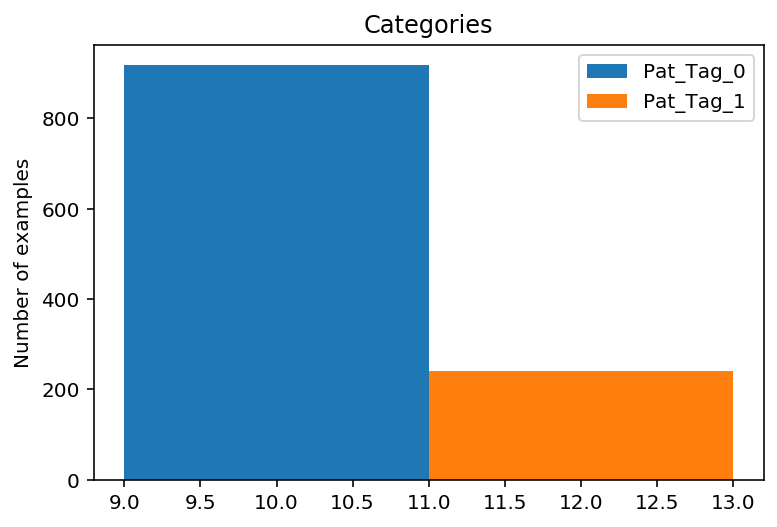

In [8]:
# bar plot of the 3 classes
plt.bar(10,Pat_Tag_0,2, label="Pat_Tag_0")
plt.bar(12,Pat_Tag_1,2, label="Pat_Tag_1")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Categories')
plt.show()

## 2 )  Feature Engineering 

###  Cleaning Dataset

#### To clean the text dataset : Converted text data to the Corpus 

In [9]:
y=patient_conversations["Pat_Tag"]
x=patient_conversations["Text"]
# Creating the corpus
Text = []
for i in range(len(x)):
    review = re.sub(r'\W', ' ', str(x[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    result = re.sub(r'\d+', ' ', review)
    
    Text.append(result)    


In [10]:
#Corpus
Text

['i don disagree with you in principle m just saying that entresto has been major failure of novartis commercial organisation they novartis were totally exposed at q  call with reimbursement issues being resolved the true underlying problem with entresto was unveiled novartis failed to create the demand for the drug their disease awareness campaign in the us the drowning man was incredibly poor fear and panic inducing what is more they advertised the wrong condition they were raising awareness of life threatening acute heart failure instead of chronic heart failure for which entresto is indicated entresto has nothing to do with the treatment of acute heart failure if that was not due to their shocking lack of knowledge of the disease area it can only be explained as conscious misleading of patients they managed to alienate medical community advocacy groups and top kols including their own principal investigator in entresto trials who publicly expressed his concerns it unheard of but it

In [11]:
#Convert the dataset into dataframe
Text= pd.DataFrame(Text, columns = ['Text']) 
# Convert the cleaned dataset to the dataframe 
patient_conversations = pd.concat([Text, y], axis=1, sort=False)
patient_conversations.head(2)

,Text,Pat_Tag
0,i don disagree with you in principle m just sa...,0
1,i am always dizzy get dizzy standing up so hav...,1


#### Stopwords

In [12]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [13]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [14]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [15]:
patient_conversations['Text'] = patient_conversations['Text'].apply(stopwords)
patient_conversations.head(10)

,Text,Pat_Tag
0,disagree principle saying entresto major failu...,0
1,always dizzy get dizzy standing made get slow ...,1
2,axelle bauer griffin filmmagic new york queen ...,0
3,throwing year almost everyday thrown blood twi...,1
4,quote originally posted boyan silyavski wake f...,0
5,theres discussion recumbent power brol extract...,0
6,course got diagnosed congestive heart failure ...,1
7,blood pressure measurement pressure arteries a...,0
8,sleep disorders may predict heart events angio...,0
9,worse manager ever ls richmond ugh self center...,0


## 1 ) Count Vectors as a features

#### Top words before stemming¶

In [16]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(patient_conversations['Text'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items() 
#dictionary

In [17]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
#print(vocab_bef_stem)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)
#print(vocab_bef_stem)

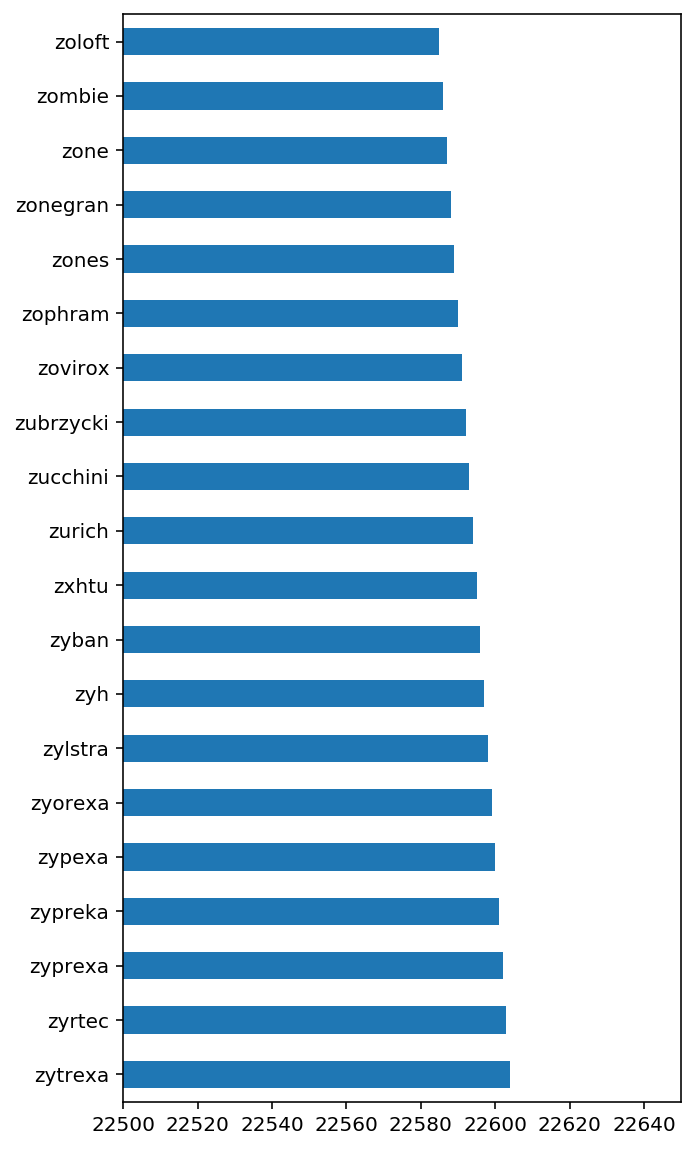

In [18]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (22500, 22650))

In [19]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
patient_conversations['Length'] = patient_conversations['Text'].apply(length)
patient_conversations.head(10)

,Text,Pat_Tag,Length
0,disagree principle saying entresto major failu...,0,1483
1,always dizzy get dizzy standing made get slow ...,1,257
2,axelle bauer griffin filmmagic new york queen ...,0,1169
3,throwing year almost everyday thrown blood twi...,1,1446
4,quote originally posted boyan silyavski wake f...,0,233
5,theres discussion recumbent power brol extract...,0,1062
6,course got diagnosed congestive heart failure ...,1,204
7,blood pressure measurement pressure arteries a...,0,10056
8,sleep disorders may predict heart events angio...,0,551
9,worse manager ever ls richmond ugh self center...,0,4184


In [20]:
Pat_Tag_0 = patient_conversations[patient_conversations['Pat_Tag'] == 0]
Pat_Tag_1= patient_conversations[patient_conversations['Pat_Tag'] == 1]

#### Histogram Plot

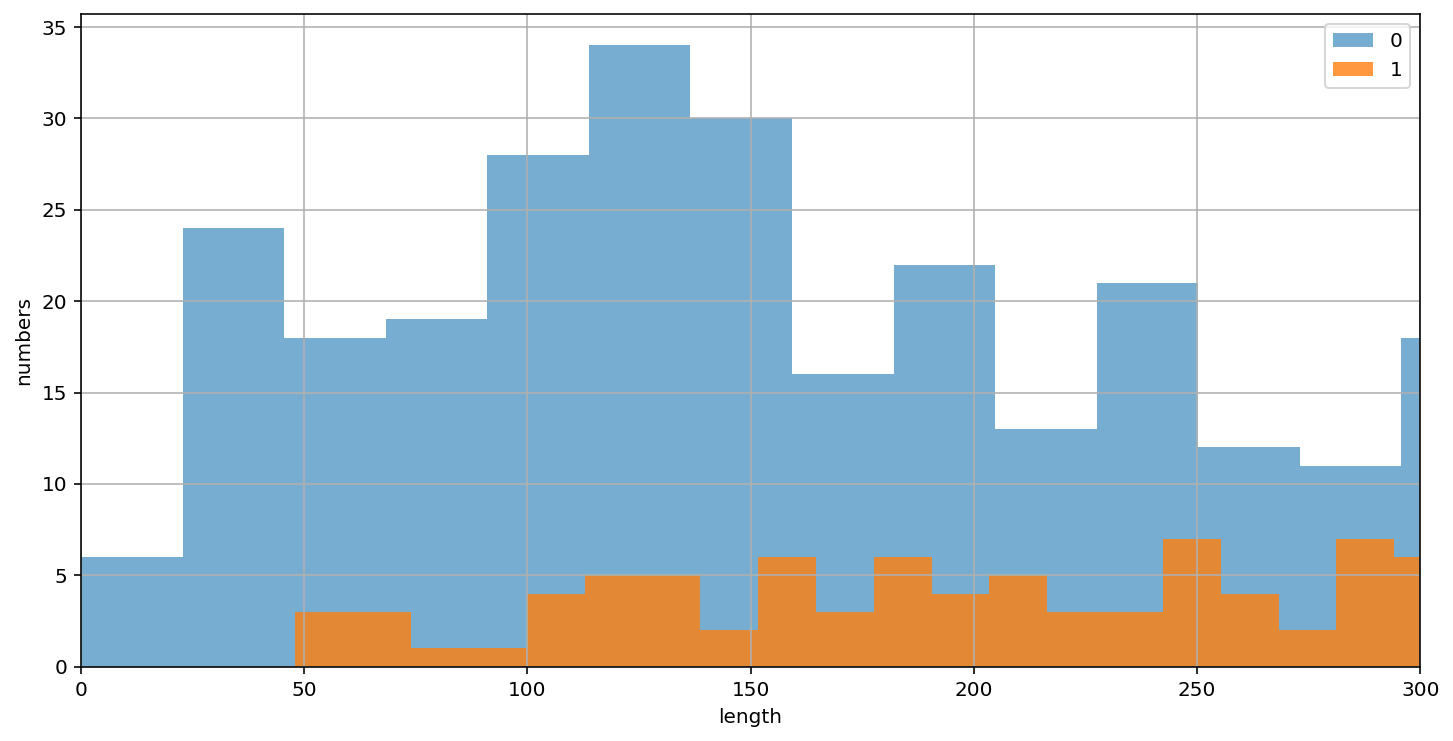

In [21]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(Pat_Tag_0['Length'], alpha = 0.6, bins=bins, label= "0")
plt.hist(Pat_Tag_1['Length'], alpha = 0.8, bins=bins, label= "1")
#plt.hist(MWS_data['length'], alpha = 0.4, bins=bins, label='MWS')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

### Top words of 0th person and their count¶

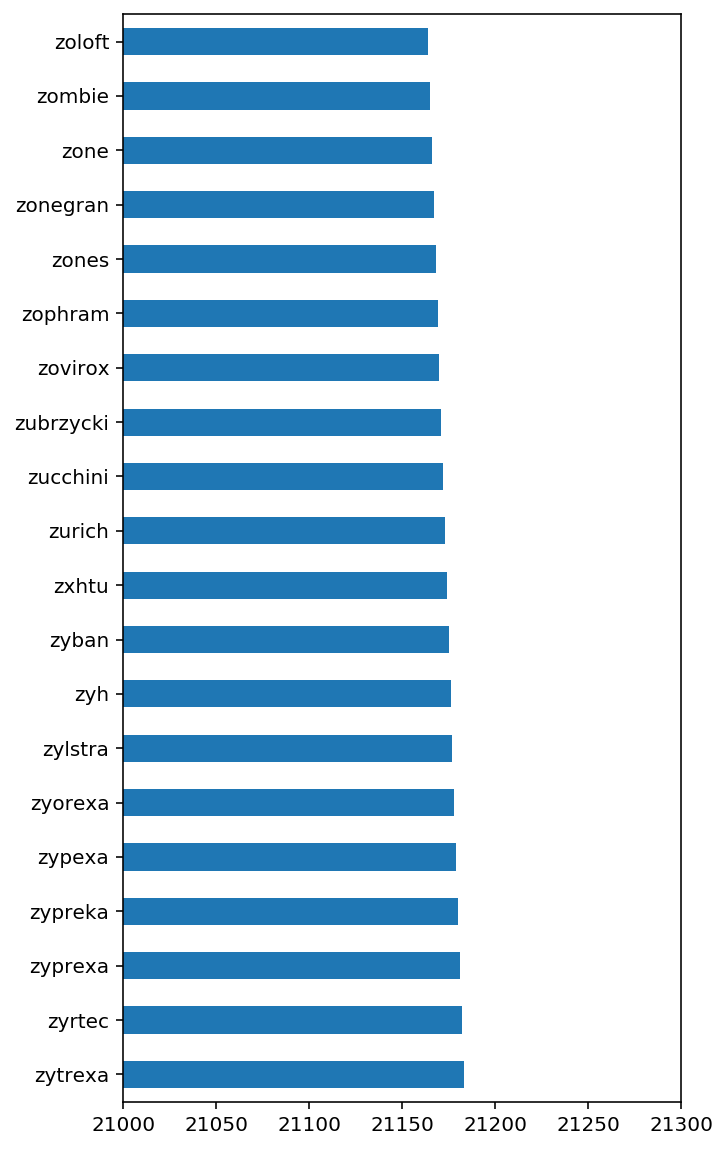

In [22]:
# create the object of tfid vectorizer
EAP_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
EAP_tfid_vectorizer.fit(Pat_Tag_0['Text'])
# collect the vocabulary items used in the vectorizer
EAP_dictionary = EAP_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in EAP_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
EAP_vocab = pd.Series(count, index=vocab)
# sort the dataframe
EAP_vocab = EAP_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = EAP_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (21000, 21300))

### Top words of 1th person and their count¶

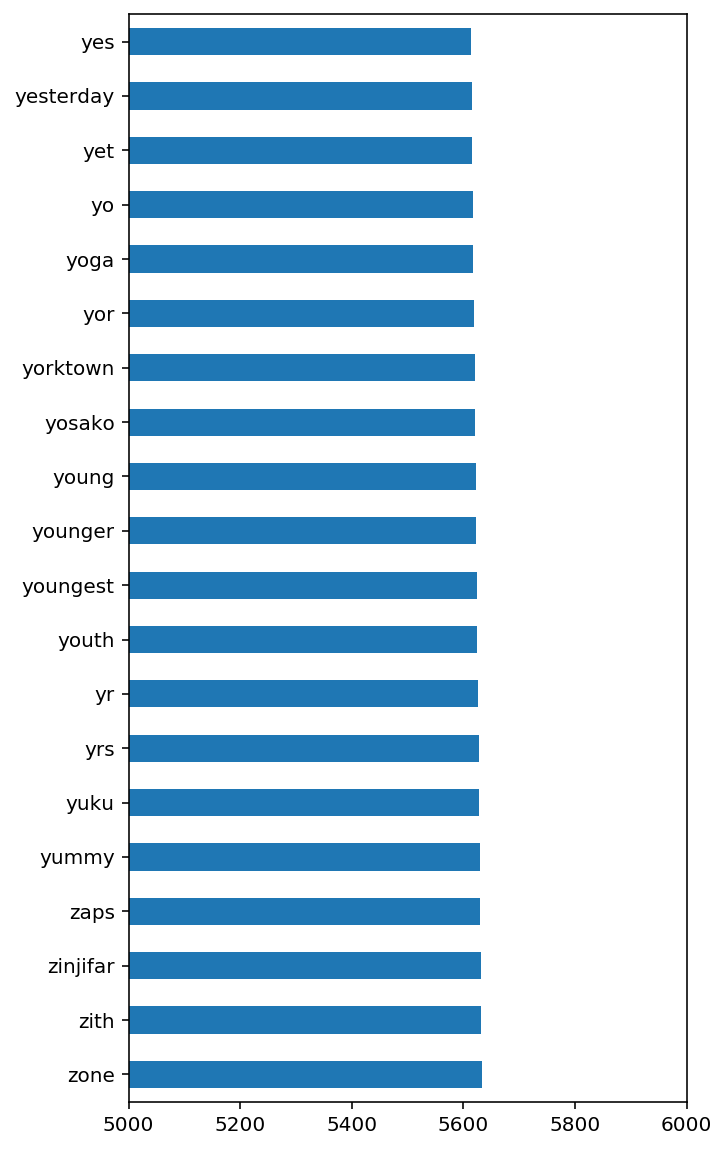

In [23]:
# create the object of tfid vectorizer
EAP_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
EAP_tfid_vectorizer.fit(Pat_Tag_1['Text'])
# collect the vocabulary items used in the vectorizer
EAP_dictionary = EAP_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in EAP_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
EAP_vocab = pd.Series(count, index=vocab)
# sort the dataframe
EAP_vocab = EAP_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = EAP_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (5000, 6000))

## 2 ) TF-IDF Extraction

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# extract the tfid representation matrix of the text data
df_x=patient_conversations["Text"]  
df_y=patient_conversations["Pat_Tag"]
cv = TfidfVectorizer()   
#df_xcv = cv.fit_transform(df_x)  
tfid_matrix = cv.fit_transform(df_x)
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [25]:
# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22595,22596,22597,22598,22599,22600,22601,22602,22603,22604
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#Adding the output to the dataframe
df['output'] = patient_conversations['Pat_Tag']
#df['id'] = data['id']
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22596,22597,22598,22599,22600,22601,22602,22603,22604,output
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
